<a href="https://colab.research.google.com/github/Joaosantos3/Curso-Python-Aplicado-Engenharia-de-Producao/blob/main/Parte3.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Estatística Aplicada

### O que vamos aprender?

Nesta seção de 4 horas, abordaremos algumas bibliotecas (*libraries*)
de análise estatística e visualização de dados, relembrar conceitos e colocá-los em prática.

- **Outliers**, como encontrá-los e o que fazer com eles.
- **Distribuição Normal/Gaussiana** um lembrete e novas aplicações.
- **Testes de normalidade** e sua importância em modelagem estatística.
- **Teste t** para amostras independentes.
- **Distribuições Comuns**, respondendo perguntas com inferência Estatística.



### Por que isso é importante?

Dominar conceitos estatísticos é fundamental para garantir análises precisas e conclusões confiáveis em diversas áreas. Identificar e tratar outliers evita distorções nos resultados. Compreender a distribuição normal e aplicar testes de normalidade assegura que as suposições dos métodos estatísticos são atendidas, resultando em análises válidas. Aplicar corretamente testes t permite comparações robustas entre médias. Conhecer diferentes distribuições estatísticas facilita responder perguntas complexas com precisão. Em suma, essas habilidades aprimoram sua capacidade de transformar dados em insights valiosos, auxiliando na tomada de decisões informadas e na otimização de processos.

### Outliers ou Valores atípicos
#### Um valor atípico (outlier) é um escore bastante diferente do resto dos dados. Quando analisamos dados devemos estar cientes de tais valores porque eles podem introduzir tendenciosidades no modelo que ajustamos aos dados. Outliers podem significar anomalias, registros errôneos ou dados corretos porém que fugiram da normalidade.

#### Geralmente existem duas formas de encontrar outliers:
- Olhar o BoxPlot
- Utilizar escores-z (z-scores)

###Usaremos os dados moldagem de fundição novamente:

- Montar o Drive
- Importar pandas
- Ler arquivo excel Dados_Moldagem_Fundicao.xlsx
- Realizar o Cálculo da Cadência (Moldes/Tempo)
- Plotar novamente o BoxPlot para cada Dupla de Trabalho

```python
from google.colab import drive
drive.mount('/content/drive')

import pandas as pd
df=pd.read_excel("/content/drive/MyDrive/Python para Produção/Dados_Moldagem_Fundicao.xlsx")

df['Cadencia']=df['Moldes']/df['Tempo Operação']

df.boxplot(by='Grupo',column='Cadencia',figsize=(14,5))

```

Mounted at /content/drive


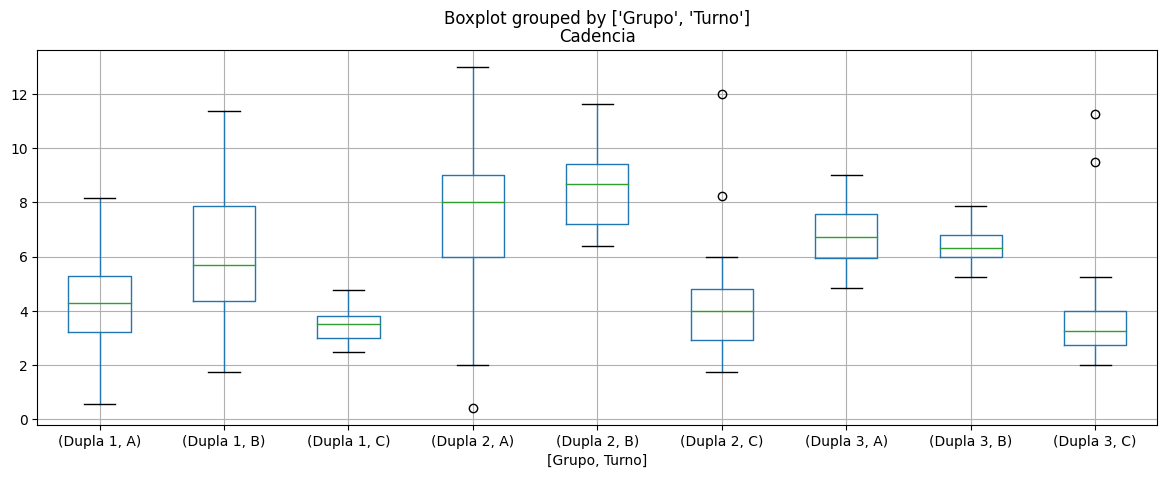

In [ ]:
from google.colab import drive
drive.mount('/content/drive')

import pandas as pd
df=pd.read_excel("/content/drive/MyDrive/Python para Produção/Dados_Moldagem_Fundicao.xlsx")

df['Cadencia']=df['Moldes']/df['Tempo Operação']

ax=df.boxplot(by=['Grupo','Turno'],column='Cadencia',figsize=(14,5))

#### Agora, com histogramas tentaremos identificar os outliers, da mesma forma:

```python
df.hist(by='Grupo',column='Cadencia',figsize=(14,5))
```

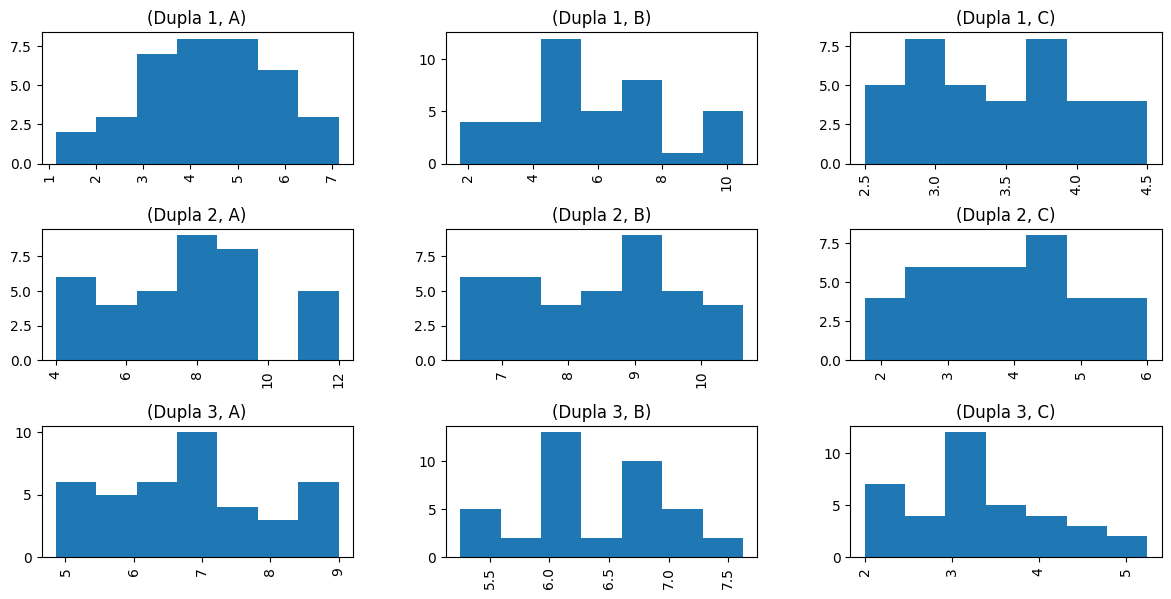

In [ ]:

ax=df.hist(by=['Grupo',"Turno"],column='Cadencia',figsize=(14,7),bins=7)

#### Como já temos noção dos valores Whiskers (As fronteiras dos quartis), criaremos máscaras booleanas com as condicionais relativas a cada grupo **que identificamos outliers** com base na cadência máxima observada.

```python
mask1=(df['Grupo']=="Dupla 1") & (df['Cadencia']>8) & (df['Turno']=="A")
df[mask1]
```

In [ ]:
mask3=(df['Grupo']=="Dupla 2") & (df['Cadencia']>6) & (df['Turno']=="C")
df[mask3]

,Turno,Moldes,Tempo Operação,Grupo,Falha Operacional,Cadencia
202,C,33,4,Dupla 2,0,8.25
219,C,48,4,Dupla 2,0,12.00


In [ ]:
mask4=(df['Grupo']=="Dupla 3") & (df['Cadencia']>6) & (df['Turno']=="C")
df[mask4]

,Turno,Moldes,Tempo Operação,Grupo,Falha Operacional,Cadencia
350,C,45,4,Dupla 3,0,11.25
354,C,38,4,Dupla 3,0,9.50


#### Fechamos então uma forma de encontrar os outliers.

#### Desta forma, vamos utilizar agora conceitos estatísticos de padronização e normalidade.

#### Padronização é o processo de transformar os dados para que tenham uma média de 0 e um desvio padrão de 1.
#### Z-Score (ou escore-z) é uma forma específica de padronização. Ele representa o número de desvios padrão que um ponto de dados está distante da média da distribuição dos dados.

#### Fórmula do Z-Score
Para calcular o Z-Score de um valor
𝑥, usamos a fórmula:
$$ z=(x–μ)/σ$$
Onde:

- x é o valor que queremos padronizar.
- 𝜇 é a média dos dados.
- 𝜎 é o desvio padrão dos dados.

Lembremos também que seguindo uma distribuição normal ou Gaussiana, temos a seguinte relação abaixo:

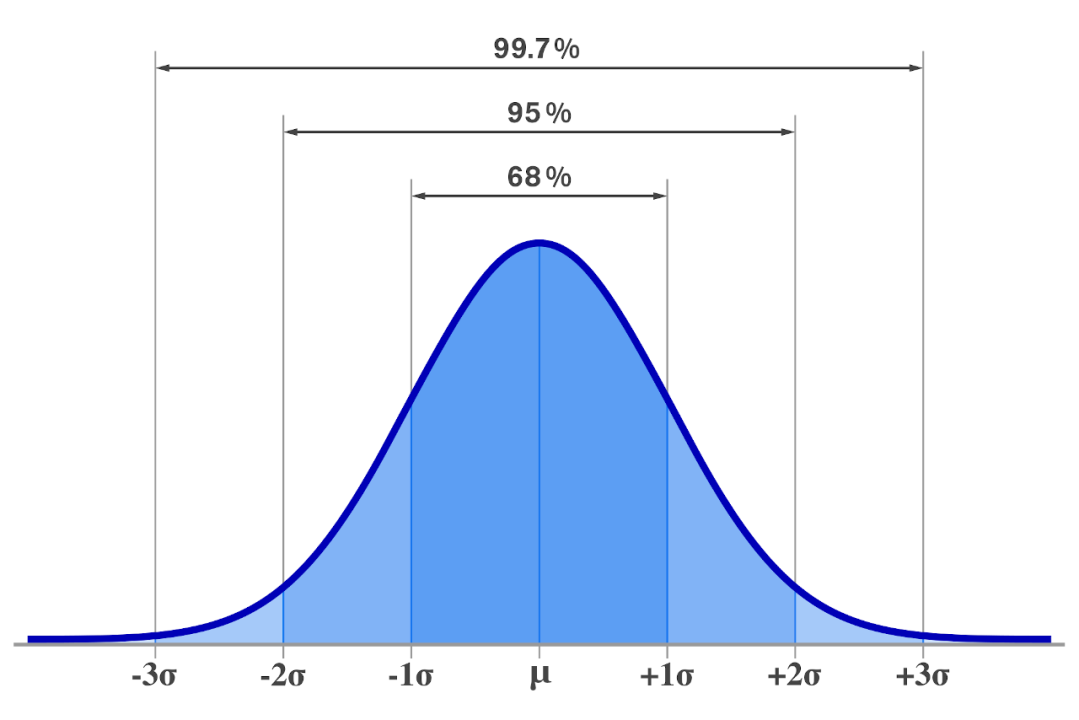

#### Faremos então o cálculo de novas colunas de **cadencia padronizada** a partir da média e desvio padrão **para cada Grupo e Turno**.

Veja, para o grupo "Dupla 1" e turno "A" temos:

```python
media=df[(df["Grupo"]=="Dupla 1")&(df["Turno"]=="A")]['Cadencia'].mean()
desvio_padrao=df[(df["Grupo"]=="Dupla 1")&(df["Turno"]=="A")]['Cadencia'].std()

df['Cadencia_Dupla1_A_p']=(df[(df["Grupo"]=="Dupla 1")&(df["Turno"]=="A")]['Cadencia']-media)/desvio_padrao
```
Podemos ainda usar loops for e iterar sobre os grupos e turnos, calculando e adicionando as novas colunas, veja:
 ```python

for turno in df.Turno.unique():
  for dupla in df.Grupo.unique():
    df_temp=df[(df["Grupo"]==dupla)&(df["Turno"]==turno)]['Cadencia']
    
    media=df_temp.mean()
    desvio_padrao=df_temp.std()

    dupla_sem_esp=dupla.replace(" ","") #removendo espaços da string
    nome_coluna="Cadencia_"+dupla_sem_esp+"_"+turno+"_p"
    df[nome_coluna]=(df_temp-media)/desvio_padrao

 ```

In [ ]:
media=df[(df["Grupo"]=="Dupla 1")&(df["Turno"]=="A")]['Cadencia'].mean()
desvio_padrao=df[(df["Grupo"]=="Dupla 1")&(df["Turno"]=="A")]['Cadencia'].std()

df['Cadencia_Dupla1_A_p']=(df[(df["Grupo"]=="Dupla 1")&(df["Turno"]=="A")]['Cadencia']-media)/desvio_padrao

In [ ]:
for turno in df.Turno.unique():
  for dupla in df.Grupo.unique():
    df_temp=df[(df["Grupo"]==dupla)&(df["Turno"]==turno)]['Cadencia']

    media=df_temp.mean()
    desvio_padrao=df_temp.std()

    dupla_sem_esp=dupla.replace(" ","") #removendo espaços da string
    nome_coluna="Cadencia_"+dupla_sem_esp+"_"+turno+"_p"
    df[nome_coluna]=(df_temp-media)/desvio_padrao

In [ ]:
df.head()

,Turno,Moldes,Tempo Operação,Grupo,Falha Operacional,Cadencia,Cadencia_Dupla1_A_p,Cadencia_Dupla2_A_p,Cadencia_Dupla3_A_p,Cadencia_Dupla1_B_p,Cadencia_Dupla2_B_p,Cadencia_Dupla3_B_p,Cadencia_Dupla1_C_p,Cadencia_Dupla2_C_p,Cadencia_Dupla3_C_p
0,A,18,7,Dupla 1,2,2.571429,-0.940176,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1,A,25,7,Dupla 1,1,3.571429,-0.359052,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2,A,26,7,Dupla 1,1,3.714286,-0.276034,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
3,A,23,7,Dupla 1,1,3.285714,-0.525087,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
4,A,30,7,Dupla 1,0,4.285714,0.056037,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


#### Iremos usar a biblioteca Scipy, especificamente o módulo ```stats``` relacionado a classes e métodos estatísticos para lembrarmos conceitos importantes.

Faremos a importação:

```python
from scipy.stats import norm
```

Lembra das funções densidade de probabilidade e função acumulativa desta função (integral)? Pois é, usaremos para identificar as probabilidades acumuladas associadas as cenários de retirada de *outliers*.

Sabemos que na distribuição Gaussiana de média 0 e desvio padrão 1 temos que entre -1,96 desvios e 1,96 possuimos probabilidade acumulada de 95% (Intervalo de Confiança, Lembra?)

Para chegarmos a este resultado faremos a probabilidade acumulada até 1.96 **subtraída** da probabilidade acumulada até 1.96:

```python
norm.cdf([1.96])-norm.cdf([-1.96])
```

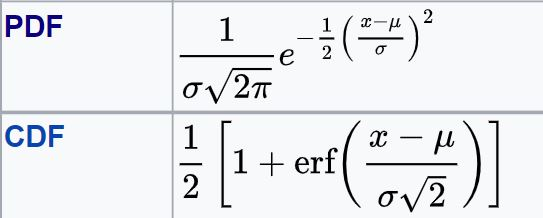

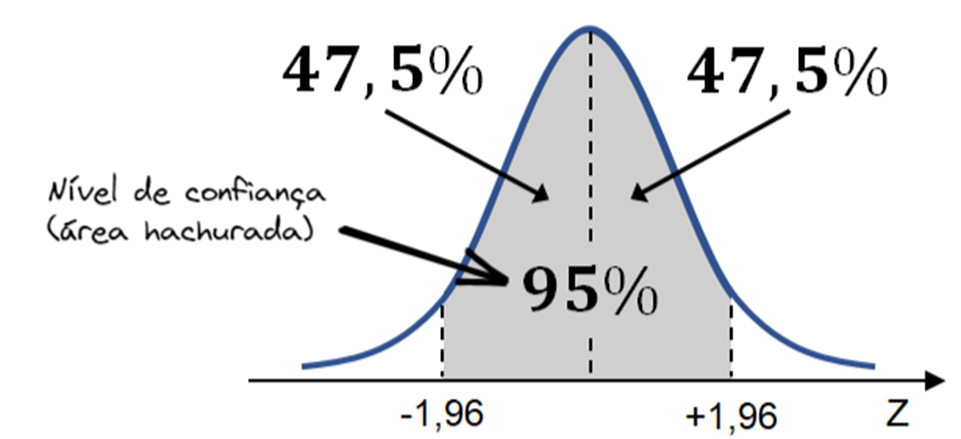

In [ ]:
from scipy.stats import norm

In [ ]:
norm.cdf([-1.96,1.96])

array([0.0249979, 0.9750021])

In [ ]:
norm.cdf([1.96])-norm.cdf([-1.96])

array([0.95000421])

#### Iremos plotar as distribuições a partir de uma nova função do ```seaborn``` chamada ```kdeplot```.

Um gráfico de estimativa de densidade de kernel (KDE) é um método para visualizar o distribuição das observações em um conjunto de dados, análogo a um histograma. KDE representa os dados usando uma curva de densidade de probabilidade contínua em um ou mais dimensões.

Link:[KDE](https://seaborn.pydata.org/generated/seaborn.kdeplot.html#seaborn.kdeplot)

- 1º Criamos um Subplot de 3 Linhas e 3 Colunas.
- 2º Faremos uma iteração ```for``` para as últimas nove colunas, representativas das combinações de grupos com turnos. Precisamos criar contadores para mudança de linha e coluna.
-3º Ajustamos as plotagens à figura com ```fig.tight_layout()```.


```python
import seaborn as sns
import matplotlib.pyplot as plt

fig,axs=plt.subplots(3,3,figsize=(14,5))

cont_x=0
cont_y=0
for coluna_pad in colunas_padr:
  sns.kdeplot(df, x=coluna_pad,ax=axs[cont_x][cont_y])
  cont_y+=1
  if cont_y==3:
    cont_x+=1
    cont_y=0

fig.tight_layout()
```

In [ ]:
colunas_padr=df.columns[-9:]
colunas_padr

Index(['Cadencia_Dupla1_A_p', 'Cadencia_Dupla2_A_p', 'Cadencia_Dupla3_A_p',
       'Cadencia_Dupla1_B_p', 'Cadencia_Dupla2_B_p', 'Cadencia_Dupla3_B_p',
       'Cadencia_Dupla1_C_p', 'Cadencia_Dupla2_C_p', 'Cadencia_Dupla3_C_p'],
      dtype='object')

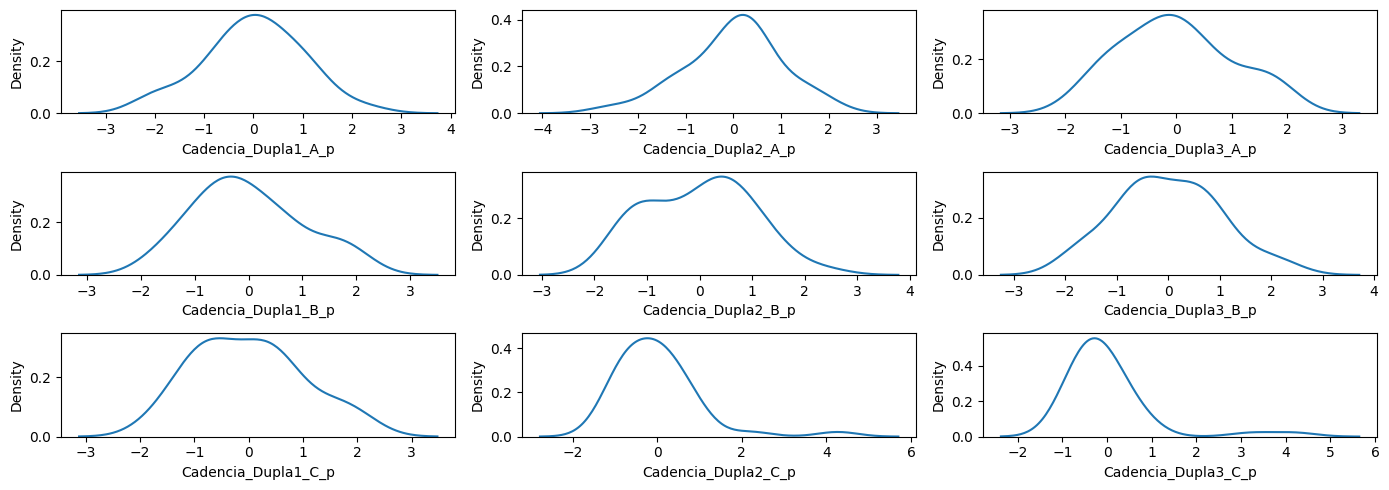

In [ ]:
import seaborn as sns
import matplotlib.pyplot as plt

fig,axs=plt.subplots(3,3,figsize=(14,5))

cont_x=0
cont_y=0
for coluna_pad in colunas_padr:
  sns.kdeplot(df, x=coluna_pad,ax=axs[cont_x][cont_y])
  cont_y+=1
  if cont_y==3:
    cont_x+=1
    cont_y=0

fig.tight_layout()

#### Para cada coluna criada faremos a filtragem do ```dataframe```. Usaremos intervalos baseados nos valores padronizados e vamos comparar com os antigos resultados baseados nos **boxplots** já criados.

Faremos para cada, definindo o limite inferior (li) e superior (ls) de Z:
```python
df[(df['Cadencia_DuplaX_Y_Padr']>ls) | (df['Cadencia_DuplaX_Y_Padr']<li)]
```
e faça o print do intervalo de confiança associado:
```python
print(norm.cdf([ls])-norm.cdf([li]))
```
Podemos iterar sobre as últimas novas colunas como fizemos antes.

```python
for coluna_pad in colunas_padr:
  print(f"==============================={coluna_pad}===========================")
  print(df[(df[coluna_pad]>1.96) | (df[coluna_pad]<-1.96)][["Cadencia",coluna_pad]])
```

In [ ]:
for coluna_pad in colunas_padr:
  print(f"==============================={coluna_pad}===========================")
  print(df[(df[coluna_pad]>1.96) | (df[coluna_pad]<-1.96)][["Cadencia",coluna_pad]])

===============================Cadencia_Dupla1_A_p===========================
    Cadencia  Cadencia_Dupla1_A_p
19  0.571429            -2.102425
20  0.571429            -2.102425
35  8.142857             2.297517
===============================Cadencia_Dupla2_A_p===========================
      Cadencia  Cadencia_Dupla2_A_p
124   2.000000            -2.037680
132  13.000000             2.021863
135   0.428571            -2.617615
===============================Cadencia_Dupla3_A_p===========================
Empty DataFrame
Columns: [Cadencia, Cadencia_Dupla3_A_p]
Index: []
===============================Cadencia_Dupla1_B_p===========================
    Cadencia  Cadencia_Dupla1_B_p
46    11.375             2.074474
===============================Cadencia_Dupla2_B_p===========================
     Cadencia  Cadencia_Dupla2_B_p
171    11.625             2.347327
===============================Cadencia_Dupla3_B_p===========================
     Cadencia  Cadencia_Dupla3_B_p
305     7.87

#### A partir dos índices dos valores atípicos  (outliers) podemos para cada situação alterar o registros dos valores de cadência para nan (e filtrarmos excluindo os valores faltantes nan) ou excluí-los de uma vez.

### ! Neste caso especificamente, vamos escluir os registros usando a função ```DataFrame.drop```. Para isto, usaremos uma **lista** para **acumular** todos os **índices** a serem excluídos e deletaremos e de uma vez.

Faremos:
```python
lista_del_indices=[]
for coluna_pad in colunas_padr:
  idx=df[(df[coluna_pad]>1.96) | (df[coluna_pad]<-1.96)].index.values
  lista_del_indices+=[i for i in idx]

lista_del_indices
```
E excluiremos os itens usando:
```python
df.drop(lista_del_indices,inplace=True)
```

In [ ]:
lista_del_indices=[]
for coluna_pad in colunas_padr:
  idx=df[(df[coluna_pad]>1.96) | (df[coluna_pad]<-1.96)].index.values
  lista_del_indices+=[i for i in idx]

lista_del_indices

[19, 20, 35, 124, 132, 135, 46, 171, 305, 85, 115, 202, 219, 350, 354]

In [ ]:
df.drop(lista_del_indices,inplace=True)

###Normalidade e Sua Importância para Testes Estatísticos

####A normalidade é um conceito fundamental em estatística que se refere à conformidade dos dados com a distribuição normal, também conhecida como distribuição Gaussiana. Essa distribuição é simétrica em torno da média, onde a maioria dos valores se concentra próximo à média e a probabilidade diminui à medida que nos afastamos dela.

####Características da Distribuição Normal:
- Simetria: A distribuição é perfeitamente simétrica em torno da média.

- Média, Mediana e Moda Iguais: Em uma distribuição normal, a média, a mediana e a moda são iguais.

- Curva de Sinos: A forma gráfica da distribuição normal é a famosa curva em forma de sino.

- Probabilidade Específica: Aproximadamente 68% dos valores estão dentro de um desvio padrão da média, 95% estão dentro de dois desvios padrão e 99.7% estão dentro de três desvios padrão.

####Importância da Normalidade em Testes Estatísticos:

- Base para Muitos Testes Estatísticos: Muitos testes estatísticos paramétricos, como t-tests e ANOVAs, assumem que os dados seguem uma distribuição normal. Isso ocorre porque essas técnicas dependem de estimativas da média e da variância, que são mais precisas quando os dados são normalmente distribuídos.

- Inferência e Intervalos de Confiança: A normalidade permite o uso de intervalos de confiança e testes de hipóteses mais robustos. Intervalos de confiança construídos a partir de dados normais são mais precisos e confiáveis.

- Aplicação de Teoremas Estatísticos: Muitos teoremas fundamentais em estatística, como o Teorema Central do Limite, baseiam-se na normalidade. Este teorema afirma que, independentemente da distribuição dos dados originais, a distribuição da média amostral se aproxima de uma distribuição normal conforme o tamanho da amostra aumenta.

- Facilidade de Interpretação: Dados que seguem uma distribuição normal são mais fáceis de interpretar e analisar. Muitos procedimentos estatísticos têm resultados que são mais facilmente compreendidos quando os dados são normalmente distribuídos.

###Testes de Normalidade

#### Nesta seção, apresentamos um resumo dos testes de normalidade de D'Agostino and Pearson, Anderson-Darling, Shapiro-Wilk, destacando suas características e aplicações.

#### Teste de D'Agostino and Pearson

O teste de D'Agostino and Pearson combina duas medidas de normalidade: a curtose e a assimetria dos dados.

- Curtose: Mede a "altura" e "largura" da distribuição em relação à distribuição normal.

- Assimetria: Mede a simetria dos dados em torno da média.
- Procedimento: Calcula as estatísticas de curtose e assimetria, e então combina essas estatísticas em uma única medida de normalidade, gerando a estatística de teste K².

- Interpretação: Valores altos de K² indicam que os dados não seguem uma distribuição normal. Esse teste é útil para detectar desvios da normalidade tanto na forma como na simetria da distribuição.

####Teste de Anderson-Darling
O teste de Anderson-Darling é uma modificação do teste de Kolmogorov-Smirnov que dá mais peso às extremidades da distribuição.

- Estatística A²: A estatística de teste A² é calculada com base na diferença entre a distribuição empírica dos dados e a distribuição normal teórica, dando mais peso às caudas.

- Procedimento: Ordena os dados e calcula a estatística A², considerando a posição dos dados nas caudas da distribuição.

- Interpretação: Valores maiores de A² indicam desvios mais acentuados da normalidade. Esse teste é especialmente sensível a desvios nas extremidades da distribuição, tornando-o adequado para detectar outliers ou desvios significativos nas caudas.

#### Teste de Shapiro-Wilk

O teste de Shapiro-Wilk é amplamente utilizado por sua eficácia, especialmente para amostras pequenas a moderadas.

- Estatística W: Compara os dados observados com os valores esperados de uma distribuição normal.

- Procedimento: Calcula a estatística W com base nas correlações entre os dados observados e os valores normais esperados.

- Interpretação: Valores baixos de W indicam um desvio significativo da normalidade. Este teste é particularmente eficaz para pequenas amostras, mas também pode ser aplicado a amostras maiores.

####Comparação e Aplicações
D’Agostino and Pearson: Melhor para detectar desvios tanto na forma quanto na simetria da distribuição. Útil para amostras de tamanho moderado a grande.

Anderson-Darling: Sensível a desvios nas extremidades da distribuição. Adequado para detectar outliers e para aplicações onde as caudas são importantes.

Shapiro-Wilk: Eficaz para amostras pequenas a moderadas. Amplamente utilizado e confiável para identificar desvios gerais da normalidade.

Para isto usaremos a biblioteca Scipy:

```python
from scipy.stats import normaltest, anderson, shapiro
```

A documentação está disponível:
[D’Agostino and Pearso](https://docs.scipy.org/doc/scipy/reference/generated/scipy.stats.normaltest.html#scipy.stats.normaltest)
[Anderson-Darling](https://docs.scipy.org/doc/scipy/reference/generated/scipy.stats.anderson.html#scipy.stats.anderson)
[Shapiro-Wilk](https://docs.scipy.org/doc/scipy/reference/generated/scipy.stats.shapiro.html#scipy.stats.shapiro)

⚡Lembrete
- Ho : Representa a Distribuição Normal
- Ha : Não representa Distribuição Normal
- p-valor:  probabilidade de se observar uma diferença tão grande ou maior do que a que foi observada sob a hipótese nula


Criaremos uma função que realize todos os testes estatístcos:

```python
def testar_normal(dados):
  print(normaltest(dados))
  print(anderson(dados))
  print(shapiro(dados))
```

E faremos um loop sobre os dados, alterando o Grupo e Turno, obtendo dados filtrados e realizando os testes estatísticos:

```python
for grupo_ in df['Grupo'].unique():
  for turno_ in df['Turno'].unique():
    print(f'Grupo: {grupo_}')
    print(f'Turno: {turno_}')
    testar_normal(df[(df['Grupo']==grupo_) & (df['Turno']==turno_)]['Cadencia'])
    print("\n")
```

In [ ]:
from scipy.stats import normaltest, anderson, shapiro

In [ ]:
def testar_normal(dados):
  print(normaltest(dados))
  print(anderson(dados))
  print(shapiro(dados))


In [ ]:
for grupo_ in df['Grupo'].unique():
  for turno_ in df['Turno'].unique():
    print(f'Grupo: {grupo_}')
    print(f'Turno: {turno_}')
    testar_normal(df[(df['Grupo']==grupo_) & (df['Turno']==turno_)]['Cadencia'])
    print("\n")

Grupo: Dupla 1
Turno: A
NormaltestResult(statistic=0.29858385014355965, pvalue=0.8613176379812426)
AndersonResult(statistic=0.15276305046755567, critical_values=array([0.529, 0.602, 0.722, 0.842, 1.002]), significance_level=array([15. , 10. ,  5. ,  2.5,  1. ]), fit_result=  params: FitParams(loc=4.277992277992278, scale=1.4277560950872863)
 success: True
 message: '`anderson` successfully fit the distribution to the data.')
ShapiroResult(statistic=0.9880954040336964, pvalue=0.9558187343081964)


Grupo: Dupla 1
Turno: B
NormaltestResult(statistic=1.3460717392811632, pvalue=0.5101574529481469)
AndersonResult(statistic=0.5289262428588515, critical_values=array([0.53 , 0.604, 0.725, 0.845, 1.005]), significance_level=array([15. , 10. ,  5. ,  2.5,  1. ]), fit_result=  params: FitParams(loc=5.967948717948718, scale=2.424470565632162)
 success: True
 message: '`anderson` successfully fit the distribution to the data.')
ShapiroResult(statistic=0.954693936115658, pvalue=0.11831403629599307)



#### Para realizar um teste t precisamos considerar:

- Independência: As observações de um grupo são independentes das observações de outro grupo.

- Normalidade: Os dados de cada grupo seguem uma distribuição aproximadamente normal. (Acabamos de realizar os teste)

- Homogeneidade de variâncias: As variâncias dos dois grupos são aproximadamente iguais.

Podemos verificar as médias e variâncias:

```python
for turno_ in df['Turno'].unique():
  for grupo_ in df['Grupo'].unique():
    print(f"Grupo:{grupo_} ",end=" ")
    print(f"Turno:{turno_} ",end=" ")
    part=df[(df['Grupo']==grupo_) & (df['Turno']==turno_)]['Cadencia']
    print("Mean:{0:1.2f}  Variance:{1:1.3f}".format(part.mean(),part.std()) ,end="")
    print("\n")
```

Para as colunas de valores padronizados:

```python
for coluna_pad in colunas_padr:
  part_=df[coluna_pad].dropna()
  print(coluna_pad,end="  ")
  print("Mean:{0:1.2f}  Variance:{1:1.3f}".format(part_.mean(),part_.std()) )
```

In [ ]:
for turno_ in df['Turno'].unique():
  for grupo_ in df['Grupo'].unique():
    print(f"Grupo:{grupo_} ",end=" ")
    print(f"Turno:{turno_} ",end=" ")
    part=df[(df['Grupo']==grupo_) & (df['Turno']==turno_)]['Cadencia']
    print("Mean:{0:1.2f}  Variance:{1:1.3f}".format(part.mean(),part.std()) ,end="")
    print("\n")

Grupo:Dupla 1  Turno:A  Mean:4.28  Variance:1.428

Grupo:Dupla 2  Turno:A  Mean:7.71  Variance:2.200

Grupo:Dupla 3  Turno:A  Mean:6.85  Variance:1.150

Grupo:Dupla 1  Turno:B  Mean:5.97  Variance:2.424

Grupo:Dupla 2  Turno:B  Mean:8.42  Variance:1.246

Grupo:Dupla 3  Turno:B  Mean:6.38  Variance:0.604

Grupo:Dupla 1  Turno:C  Mean:3.45  Variance:0.545

Grupo:Dupla 2  Turno:C  Mean:3.88  Variance:1.156

Grupo:Dupla 3  Turno:C  Mean:3.32  Variance:0.868



In [ ]:
for coluna_pad in colunas_padr:
  part_=df[coluna_pad].dropna()
  print(coluna_pad,end="  ")
  print("Mean:{0:1.2f}  Variance:{1:1.3f}".format(part_.mean(),part_.std()) )

Cadencia_Dupla1_A_p  Mean:0.05  Variance:0.830
Cadencia_Dupla2_A_p  Mean:0.07  Variance:0.812
Cadencia_Dupla3_A_p  Mean:0.00  Variance:1.000
Cadencia_Dupla1_B_p  Mean:-0.05  Variance:0.954
Cadencia_Dupla2_B_p  Mean:-0.06  Variance:0.937
Cadencia_Dupla3_B_p  Mean:-0.06  Variance:0.941
Cadencia_Dupla1_C_p  Mean:-0.11  Variance:0.904
Cadencia_Dupla2_C_p  Mean:-0.17  Variance:0.632
Cadencia_Dupla3_C_p  Mean:-0.20  Variance:0.482


###Realizando a comparação entre as médias usando Teste T.

####Teste estatísticos são importantes para tomada de decisões. Comparando a média dos valores dos grupos para cada turno, podemos inferir que alguns grupos possuem produtividade similar ou diferente e assim podemos ajustar nossa capacidade e mão de obra e descobrir qual a combinação entre grupos e turnos que efetivamente é melhor.

#### Usaremos o Teste T, em especial o **Welch’s t-test** para comparar nosso grupos para turnos similares.

Para importar o teste fazemos:

```python
from scipy.stats import ttest_ind
```

Faremos então comparação em pares, isto é, para cada turno especificamente, faremos que os grupos sejam comparados, para isso, criaremos uma estrutura loop ```for``` mais complexa, seguinte:

```python
resultados_ttest=pd.DataFrame()


for turno_ in df['Turno'].unique():
  for grupo_1 in df['Grupo'].unique():
    for grupo_2 in df['Grupo'].unique():
      if grupo_1==grupo_2:
        continue
      else:
        
        descricao1=str(grupo_1)+" "+ str(turno_)
        descricao2=str(grupo_2)+" "+ str(turno_)
        
        print(f"Grupo 1: {descricao1}")
        print(f"Grupo 2: {descricao2}")
        temp1=df[(df['Grupo']==grupo_1) & (df['Turno']==turno_)]['Cadencia'].values
        temp2=df[(df['Grupo']==grupo_2) & (df['Turno']==turno_)]['Cadencia'].values

        res=ttest_ind(temp1, temp2,equal_var=False)
        print(res)
        if res.pvalue>=0.05:
          print("Ho aceita: média iguais estatísticamente para 95% de confiança")
        else:
          print("Ho rejeitada, aceita Ha: média diferentes estatísticamente para 95% de confiança")
        
        print("\n")
```


In [ ]:
from scipy.stats import ttest_ind

In [ ]:
resultados_ttest=pd.DataFrame()


for turno_ in df['Turno'].unique():
  for grupo_1 in df['Grupo'].unique():
    for grupo_2 in df['Grupo'].unique():
      if grupo_1==grupo_2:
        continue
      else:

        descricao1=str(grupo_1)+" "+ str(turno_)
        descricao2=str(grupo_2)+" "+ str(turno_)

        print(f"Grupo 1: {descricao1}")
        print(f"Grupo 2: {descricao2}")
        temp1=df[(df['Grupo']==grupo_1) & (df['Turno']==turno_)]['Cadencia'].values
        temp2=df[(df['Grupo']==grupo_2) & (df['Turno']==turno_)]['Cadencia'].values

        res=ttest_ind(temp1, temp2,equal_var=False)
        print(res)
        if res.pvalue>=0.05:
          print("Ho aceita: média iguais estatísticamente para 95% de confiança")
        else:
          print("Ho rejeitada, aceita Ha: média diferentes estatísticamente para 95% de confiança")

        print("\n")

Grupo 1: Dupla 1 A
Grupo 2: Dupla 2 A
TtestResult(statistic=-7.9709838624545934, pvalue=4.554081349282318e-11, df=61.76374799948753)
Ho rejeitada, aceita Ha: média diferentes estatísticamente para 95% de confiança


Grupo 1: Dupla 1 A
Grupo 2: Dupla 3 A
TtestResult(statistic=-8.649547590781987, pvalue=1.2720355923571845e-12, df=69.18648440028659)
Ho rejeitada, aceita Ha: média diferentes estatísticamente para 95% de confiança


Grupo 1: Dupla 2 A
Grupo 2: Dupla 1 A
TtestResult(statistic=7.9709838624545934, pvalue=4.554081349282318e-11, df=61.76374799948753)
Ho rejeitada, aceita Ha: média diferentes estatísticamente para 95% de confiança


Grupo 1: Dupla 2 A
Grupo 2: Dupla 3 A
TtestResult(statistic=2.144099118848868, pvalue=0.03659833537868241, df=53.36771382985038)
Ho rejeitada, aceita Ha: média diferentes estatísticamente para 95% de confiança


Grupo 1: Dupla 3 A
Grupo 2: Dupla 1 A
TtestResult(statistic=8.649547590781987, pvalue=1.2720355923571845e-12, df=69.18648440028659)
Ho rejeit

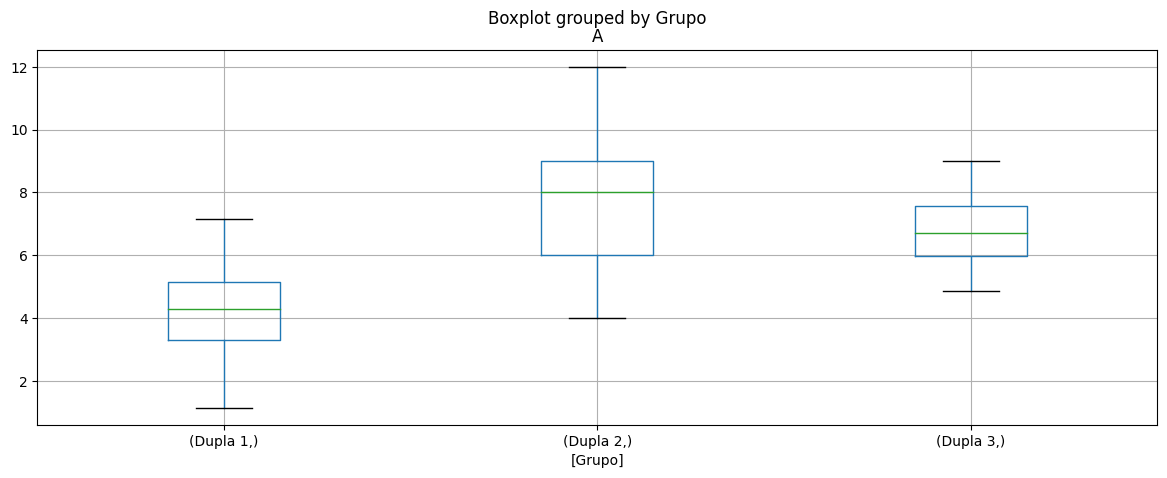

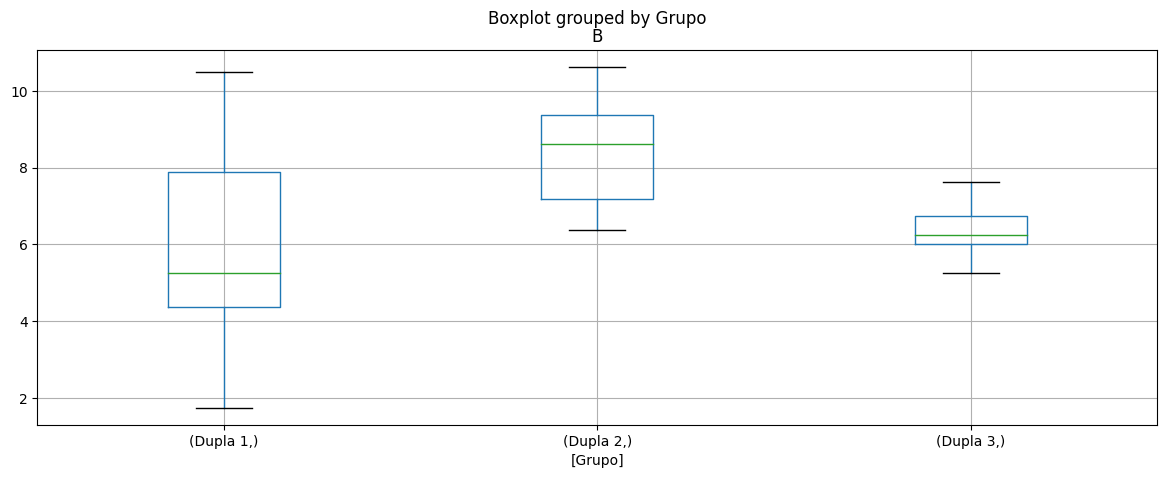

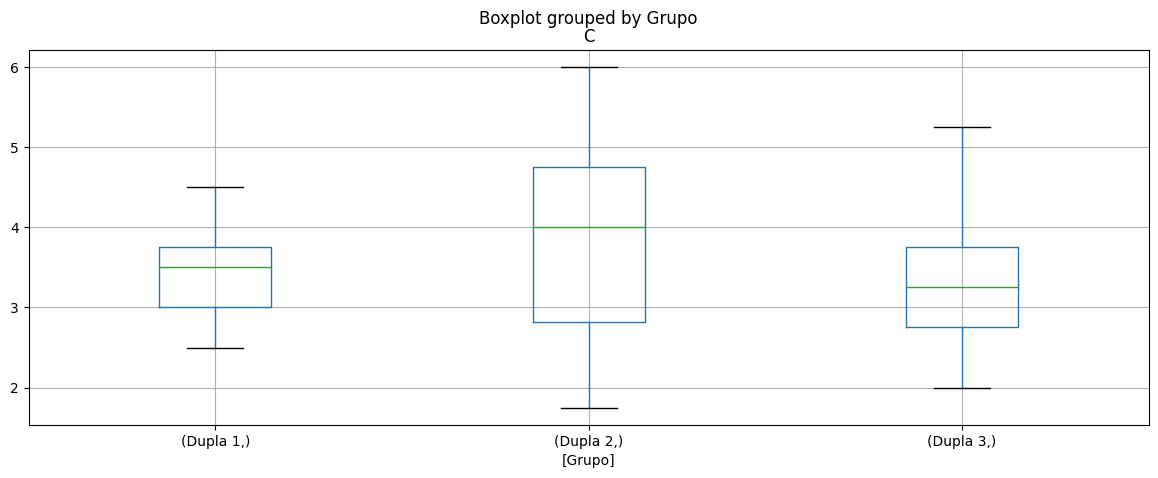

In [ ]:
for turno_ in df['Turno'].unique():
  df[df['Turno']==turno_].boxplot(by=['Grupo',],column='Cadencia',figsize=(14,5))
  plt.title(turno_)

###BÔNUS DE ESTATÍSTICA ---- EST 220!

#### ANOVA E TESTE TUKEY, BELOS MOTIVOS PARA USAR!

### Quando realizamos vários testes t entre grupos:

- Problema: Realizar vários testes t aumenta a probabilidade de cometer um erro do tipo I (falso positivo) porque cada teste adicional aumenta a chance de encontrar uma diferença significativa por acaso. Isso é conhecido como problema de comparações múltiplas.

#### Falso positivo: rejeitar a hipótese nula quando ela é verdadeira e absoluta, isto é, quando não há diferença estatística entre as médias, mas dizemos que sim! Seria o mesmo que dizer que um turno é melhor ou pior que o outro sendo que **NÃO** é!

#### Para fugir disso, usaremos
#### Teste de Tukey (HSD - Honest Significant Difference):

- Quando usar: O teste de Tukey é mais apropriado quando você já realizou uma ANOVA e encontrou uma diferença significativa. Ele é projetado para comparar todas as possíveis combinações de grupos ao mesmo tempo, controlando a taxa de erro do tipo I ao nível desejado.

- Vantagens: O teste de Tukey é mais conservador e reduz a probabilidade de cometer um erro do tipo I em comparação com múltiplos testes t. Ele também é fácil de interpretar, pois fornece comparações par a par com um único critério de significância.

**Relembrando conceitos**:
Se o valor p for menor que 0.05 (f grande), você pode rejeitar a hipótese nula de que as médias dos grupos são iguais, o que indica que há uma diferença significativa entre pelo menos dois dos grupos.



#### PARA ISSO VAMOS FAZER A ANÁLISE DE VARIÂNCIA PRIMEIRO PARA CADA TURNO:
```python
import statsmodels.api as sm
from statsmodels.formula.api import ols
for turno in df.Turno.unique():
  print("\n")
  print(f"Turno {turno} analisado")
  # Definindo o modelo
  modelo = ols('Cadencia ~ C(Grupo)', data=df[df['Turno']==turno]).fit()

  # Realizando a ANOVA
  anova_result = sm.stats.anova_lm(modelo, typ=2)
  print(anova_result)
```


In [ ]:
import statsmodels.api as sm
from statsmodels.formula.api import ols
for turno in df.Turno.unique():
  print("\n")
  print(f"Turno {turno} analisado")
  # Definindo o modelo
  modelo = ols('Cadencia ~ C(Grupo)', data=df[df['Turno']==turno]).fit()

  # Realizando a ANOVA
  anova_result = sm.stats.anova_lm(modelo, typ=2)
  print(anova_result)



Turno A analisado
              sum_sq     df          F        PR(>F)
C(Grupo)  237.222516    2.0  44.009911  8.446537e-15
Residual  299.156467  111.0        NaN           NaN


Turno B analisado
              sum_sq     df          F        PR(>F)
C(Grupo)  135.043536    2.0  25.984888  5.034116e-10
Residual  296.229167  114.0        NaN           NaN


Turno C analisado
             sum_sq     df         F    PR(>F)
C(Grupo)   6.409693    2.0  4.026321  0.020532
Residual  87.557121  110.0       NaN       NaN


#### O SEGUNDO PASSO É REALIZAR O TESTE TUKEY E PLOTAR OS RESULTADOS
#### Lembrando:
#### - Ho: não há diferença estatística
#### - Ha: existe diferença estatística

```python
from statsmodels.stats.multicomp import pairwise_tukeyhsd
import matplotlib.pyplot as plt

for turno in df.Turno.unique():
  print("\n")
  print(f"Teste Tukey para turno {turno}")
  tukey = pairwise_tukeyhsd(endog=df[df['Turno']==turno]['Cadencia'],groups=df[df['Turno']==turno]['Grupo'], alpha=0.05)
  print(tukey)
  tukey.plot_simultaneous()
  plt.title('Comparações múltiplas - Teste de Tukey')
  plt.show()
```



Teste Tukey para turno A
 Multiple Comparison of Means - Tukey HSD, FWER=0.05 
 group1  group2 meandiff p-adj   lower  upper  reject
-----------------------------------------------------
Dupla 1 Dupla 2   3.4363    0.0  2.5296  4.343   True
Dupla 1 Dupla 3   2.5684    0.0  1.6789  3.458   True
Dupla 2 Dupla 3  -0.8679 0.0575 -1.7574 0.0217  False
-----------------------------------------------------


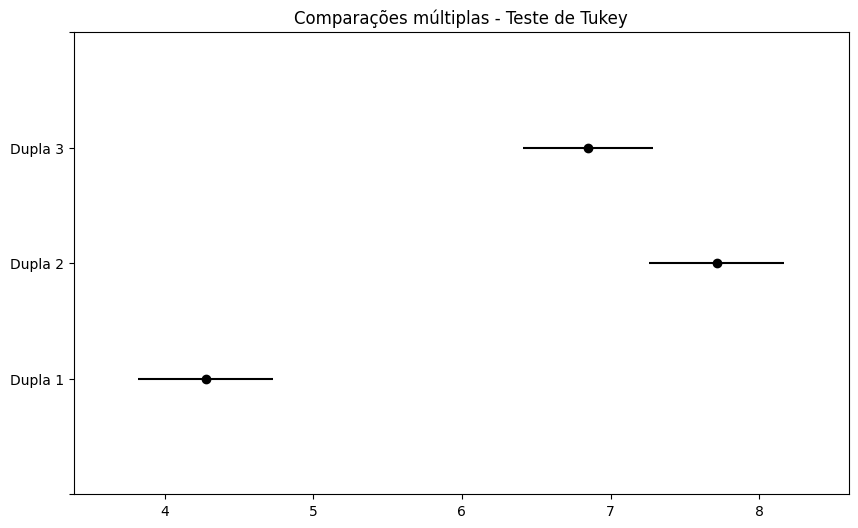



Teste Tukey para turno B
 Multiple Comparison of Means - Tukey HSD, FWER=0.05  
 group1  group2 meandiff p-adj   lower   upper  reject
------------------------------------------------------
Dupla 1 Dupla 2   2.4551    0.0  1.5883   3.322   True
Dupla 1 Dupla 3   0.4071 0.5068 -0.4598  1.2739  False
Dupla 2 Dupla 3  -2.0481    0.0  -2.915 -1.1812   True
------------------------------------------------------


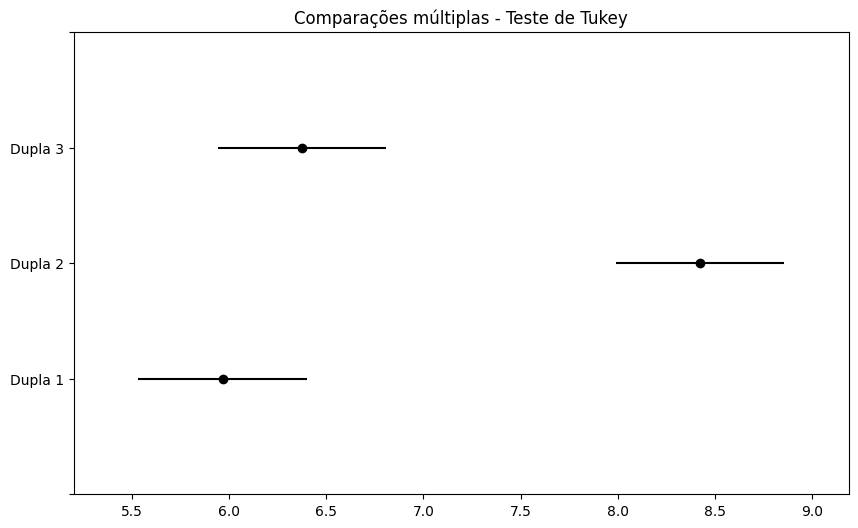



Teste Tukey para turno C
 Multiple Comparison of Means - Tukey HSD, FWER=0.05  
 group1  group2 meandiff p-adj   lower   upper  reject
------------------------------------------------------
Dupla 1 Dupla 2   0.4276 0.0967 -0.0587  0.9139  False
Dupla 1 Dupla 3  -0.1296 0.8045 -0.6192  0.3599  False
Dupla 2 Dupla 3  -0.5573 0.0215 -1.0468 -0.0677   True
------------------------------------------------------


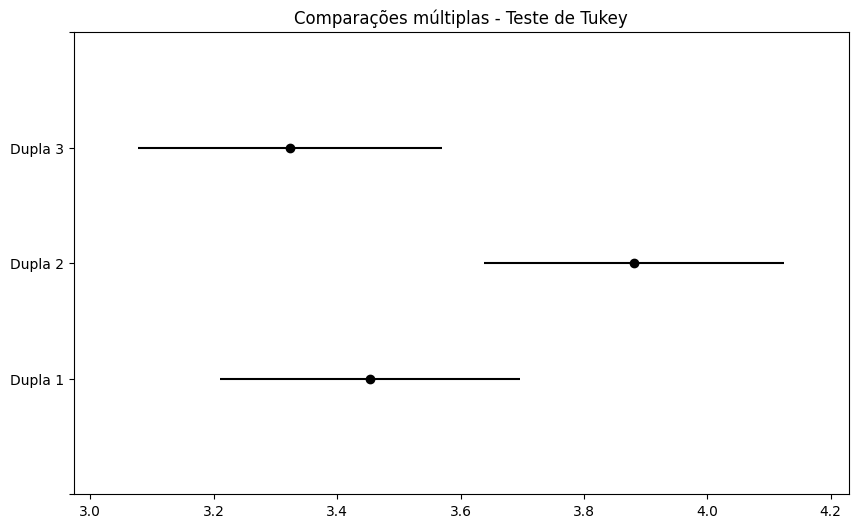

In [ ]:
from statsmodels.stats.multicomp import pairwise_tukeyhsd
import matplotlib.pyplot as plt

for turno in df.Turno.unique():
  print("\n")
  print(f"Teste Tukey para turno {turno}")
  tukey = pairwise_tukeyhsd(endog=df[df['Turno']==turno]['Cadencia'],groups=df[df['Turno']==turno]['Grupo'], alpha=0.05)
  print(tukey)
  tukey.plot_simultaneous()
  plt.title('Comparações múltiplas - Teste de Tukey')
  plt.show()

#Simulação de Monte Carlo

### Como funciona?

A simulação de Monte Carlo é uma técnica estatística que utiliza a geração de números aleatórios para modelar e analisar sistemas complexos e processos incertos. É amplamente utilizada em diversas áreas, como finanças, física, engenharia e outras ciências, para estimar a probabilidade de diferentes resultados em um processo que não pode ser facilmente determinado de forma analítica.

### Onde aplicaremos?

Lembra do termo estocástico? Sim! Podem ser explicados por distruibuições de probabilidade, que possuem variáveis aleatórias...

### Aplicaremos no resultado financeiro de uma empresa!

Simular os lucros de uma empresa usando a técnica de Monte Carlo é uma aplicação prática e interessante. Vamos fazer uma simulação onde estimaremos os lucros de uma empresa levando em consideração a incerteza em suas receitas e custos.

Para isso faremos, precisamos:

- Obter dados de receitas e custos.
- Descobrir, estes dados seguem qual distribuição?
- Preparar a Modelagem.
- Realizar Simulação.
- Analisar Resultados.



###Obtendo dados do arquivo .csv

```python
df_emp=pd.read_csv("/content/drive/MyDrive/Python para Produção/empresa_res.csv",sep=';')
```

In [ ]:
df_emp=pd.read_csv("/content/drive/MyDrive/Python para Produção/empresa_res.csv",sep=';')

### Explorando nossos dados

Use:

```python
df_emp.info()
```

In [ ]:
df_emp.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 471 entries, 0 to 470
Data columns (total 3 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   Data           471 non-null    object 
 1   Receita (mil)  471 non-null    float64
 2   CMV (mil)      471 non-null    float64
dtypes: float64(2), object(1)
memory usage: 11.2+ KB


### Ajuste a coluna de Data

Use:

```python
df_emp['Data']=pd.to_datetime(df_emp['Data'].values,format='%d/%m/%Y')
```

In [ ]:
df_emp['Data']=pd.to_datetime(df_emp['Data'].values,format='%d/%m/%Y')

### Explorando nossos dados, ver os 5 primeiros valores

Use:

```python
df_emp.head()
```

In [ ]:
df_emp.head()

,Data,Receita (mil),CMV (mil)
0,2020-01-01,51.18,15.55
1,2020-01-02,58.19,17.68
2,2020-01-03,41.99,12.60
3,2020-01-04,59.63,18.46
4,2020-01-05,116.05,34.99


### Realize a plotagem das séries históricas para as duas colunas de valores

Use:

```python
df_emp.plot.line(x='Data',y='Receita (mil)',figsize=(20,5))
```

<Axes: xlabel='Data'>

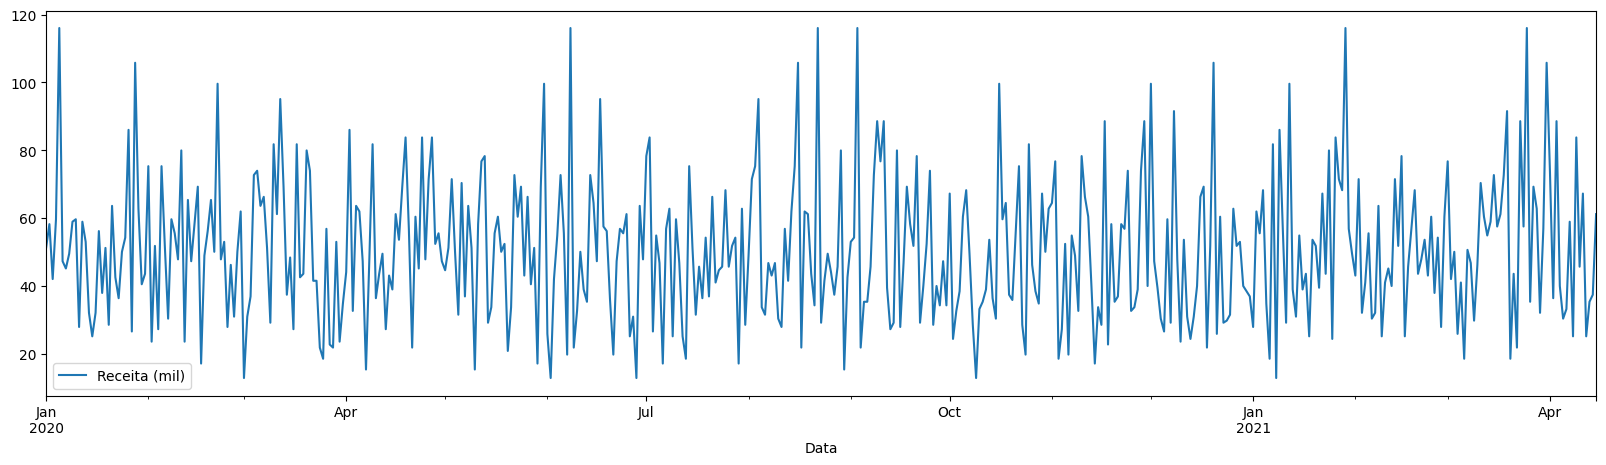

In [ ]:
df_emp.plot.line(x='Data',y='Receita (mil)',figsize=(20,5))

<Axes: xlabel='Data'>

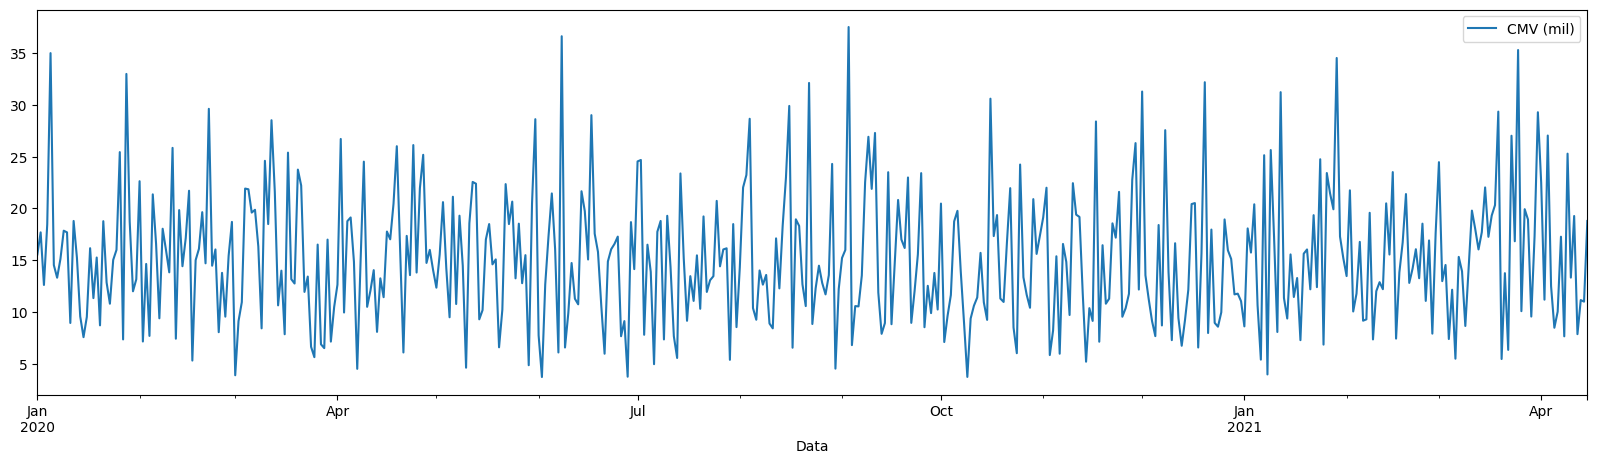

In [ ]:
df_emp.plot.line(x='Data',y='CMV (mil)',figsize=(20,5))

<Axes: xlabel='Data'>

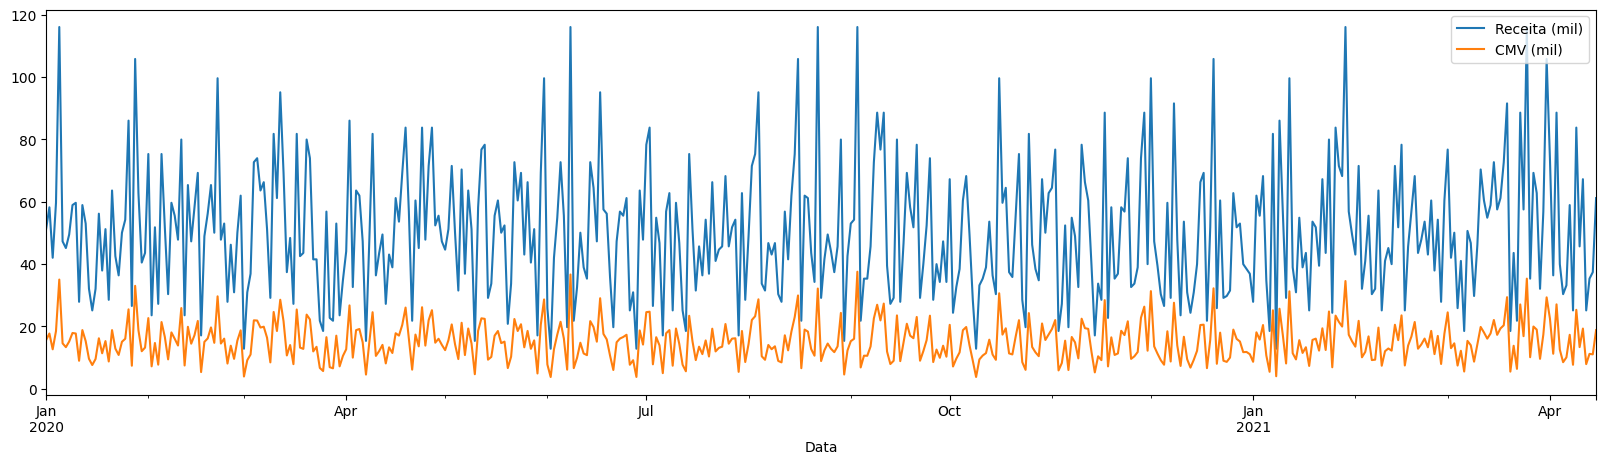

In [ ]:
df_emp.plot.line(x='Data',y=['Receita (mil)','CMV (mil)'],figsize=(20,5))

### Precisaremos agora de uma Library/Biblioteca para adequar o nosso conjunto de dados (ou recorte) a uma distribuição de probabilidade específica. Vamos descobrir qual será ?!

Instalamos a library ```fitter```
```python
!pip install fitter
```
E usaremos
```python
from fitter import Fitter, get_common_distributions
```
- Com Fitter buscaremos o melhor ajuste a uma distribuição.
- Com get_common_distributions usaremos algumas distribuições como parâmetro para teste de ajuste!

Existem várias maneiras de buscar um melhor ajuste (Goodness of Fit),
um exemplo no excel:

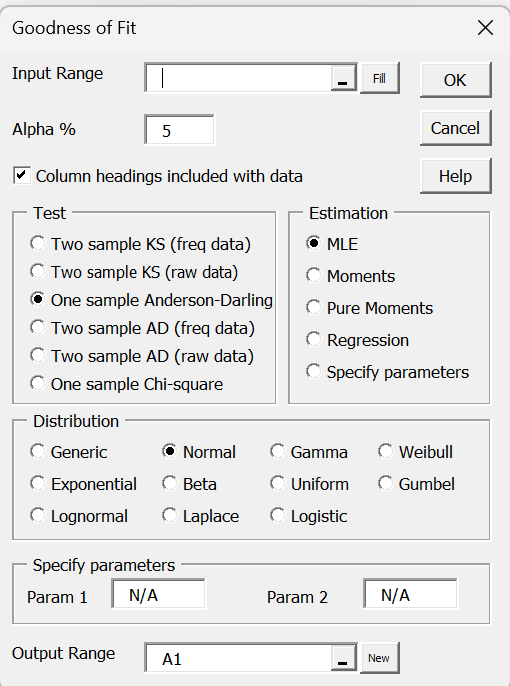

In [ ]:
!pip install fitter

   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 62.5/62.5 kB 3.4 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 8.3/8.3 MB 50.9 MB/s eta 0:00:00
  Attempting uninstall: matplotlib
    Found existing installation: matplotlib 3.7.1
    Uninstalling matplotlib-3.7.1:
      Successfully uninstalled matplotlib-3.7.1


/usr/local/lib/python3.10/dist-packages/pandas/core/nanops.py:1010: RuntimeWarning: invalid value encountered in subtract
  sqr = _ensure_numeric((avg - values) ** 2)


,sumsquare_error,aic,bic,kl_div,ks_statistic,ks_pvalue
rayleigh,0.002948,1012.027625,1020.337341,inf,0.023321,0.954622
gamma,0.003027,1016.354169,1028.818743,inf,0.034215,0.627043
chi2,0.003027,1016.354196,1028.818770,inf,0.034215,0.627039
lognorm,0.003053,1019.531827,1031.996401,inf,0.032935,0.673870
exponpow,0.003215,1005.675314,1018.139889,inf,0.053462,0.130596


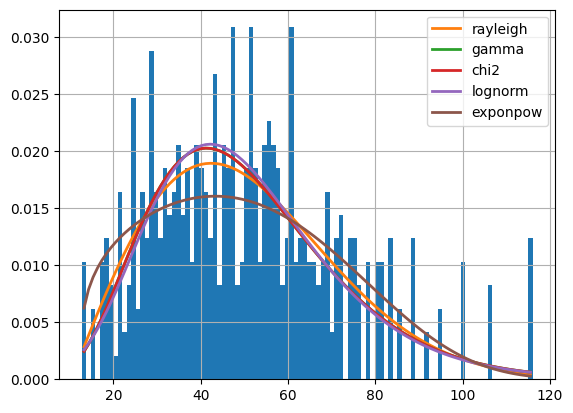

In [ ]:
from fitter import Fitter, get_common_distributions
import numpy as np

# Dados simulados
data = np.random.normal(0, 1, 1000)

# Ajustando e comparando várias distribuições
f = Fitter(df_emp["Receita (mil)"], distributions=get_common_distributions())
f.fit()

# Exibindo as melhores distribuições
f.summary()

In [ ]:
f.get_best()

{'rayleigh': {'loc': 10.365804054968944, 'scale': 32.04837191296966}}

In [ ]:
from scipy.stats import rayleigh

In [ ]:
receita_mil=rayleigh.rvs(loc=10.3658,scale=32.0483,size=10000)
print(receita_mil.shape)

(10000,)


/usr/local/lib/python3.10/dist-packages/pandas/core/nanops.py:1010: RuntimeWarning: invalid value encountered in subtract
  sqr = _ensure_numeric((avg - values) ** 2)


,sumsquare_error,aic,bic,kl_div,ks_statistic,ks_pvalue
rayleigh,0.017767,820.216656,828.526372,inf,0.020555,0.986295
gamma,0.018349,817.365964,829.830538,inf,0.026223,0.893723
chi2,0.018349,817.365739,829.830314,inf,0.026223,0.893723
lognorm,0.018603,820.182895,832.647470,inf,0.029236,0.804345
norm,0.021067,866.298778,874.608494,inf,0.053336,0.132271


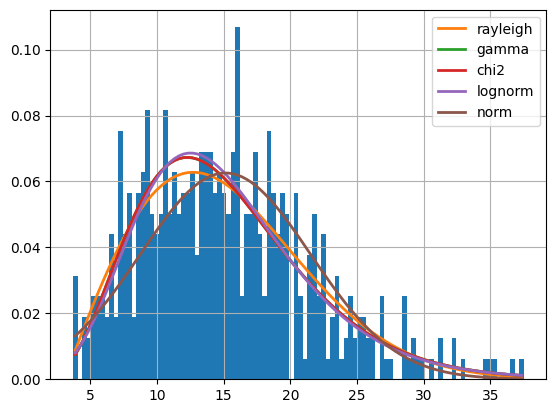

In [ ]:
f2 = Fitter(df_emp["CMV (mil)"], distributions=get_common_distributions())
f2.fit()
f2.summary()

In [ ]:
f2.get_best()

{'rayleigh': {'loc': 3.0544524927953747, 'scale': 9.65841560970017}}

In [ ]:
CMV_mil=rayleigh.rvs(loc=3.0544,scale=9.6584,size=10000)
print(CMV_mil.shape)

(10000,)


In [ ]:
receita_mil.sort()

In [ ]:
CMV_mil.sort()

In [ ]:
Lucro=receita_mil-CMV_mil

In [ ]:
import seaborn as sns

<Axes: ylabel='Density'>

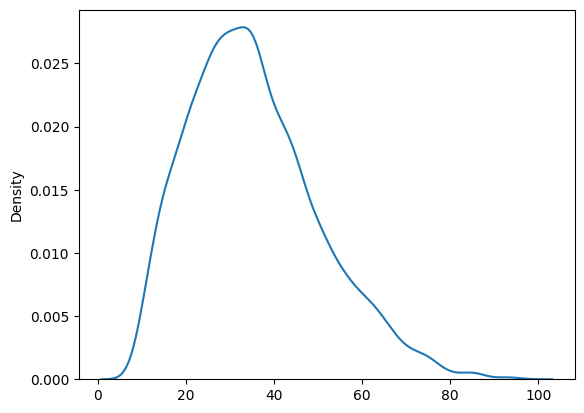

In [ ]:
sns.kdeplot(Lucro)

- Qual a probabilidade de se obter um Lucro maior que 50 mil?
- Qual a probabilidade de se obter um Lucro extraordinário superior a 80 mil?
- Qual a probabilidade de se obter um valor péssimo de Lucro, inferior a 10 mil?
- Qual o intervalo de confiança associado a aproximados 80%?
Aqui é possível:

- 1: Ajustar o novo resultado a uma distribuição e obter as respostas
- 2: Contabilizar a frequência calculando diretamente

In [ ]:
prob_maior_50=(Lucro[Lucro>=50].shape[0]/10000)*100
print(f"P (X>=50): {np.round(prob_maior_50,2)}%")

P (X>=50): 16.14%


In [ ]:
prob_maior_80=(Lucro[Lucro>80].shape[0]/10000)*100
print(f"P (X>80): {np.round(prob_maior_80,2)}%")

P (X>80): 0.53%


In [ ]:
prob_menor_10=(Lucro[Lucro<10].shape[0]/10000)*100
print(f"P (X<10): {np.round(prob_menor_10,2)}%")

P (X<10): 0.56%


In [ ]:
prob_menor_10=(Lucro[(Lucro>17) & ((Lucro<55))].shape[0]/10000)*100
print(f"P (X<10): {np.round(prob_menor_10,2)}%")

P (X<10): 79.71%
